# EE5377 - Introduction to Image Processing

Homework-2

## Imports

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import cv2
import random
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Images

Images used in this Assignment aare GrayScale. Images are downloaded from 
1. University of Southern California’s image database at http://sipi.usc.edu/database/database.php?volume=misc.

## 2D-DFT

1. Calculating DFT and IDFT using Summation and Matrix Multiplication.
2. Verifying Properties of DFT and IDFT
3. Importance of Phase of DFT of Image

### Reading Image

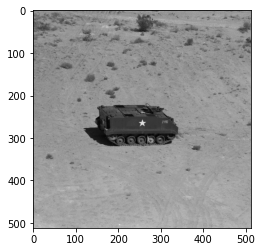

In [2]:
img = pimg.imread('Images/7.1.08.tiff')
plt.imshow(img,cmap='gray')
plt.show()

### Summation

As Summation Operation over 512 X 512 Image is Expensive, we will be doing it over 32 X 32 part of same Image.

#### DFT

$\tilde{I}(u, v)=\sum_{i=0}^{N-1} \sum_{j=0}^{M-1} I(i, j) W_{N}^{u i} W_{M}^{v j}$

In [3]:
def DFTSummation(I):
    N = I.shape[0]
    W = np.exp(-1.0 * 2j * np.pi/N)

    I_DFT = 1j * np.zeros(I.shape)
    
    for u in range(N):
        for v in range(N):
            for i in range(N):
                for j in range(N):
                    I_DFT[u][v] += (I[i][j] * pow(W,(u*i + v*j)))
    return I_DFT

In [4]:
imgDFT = DFTSummation(img[:32,:32])

#### IDFT

$I(i, j)=\frac{1}{N^2}\sum_{u=0} \sum_{v=0}^{N-1} \tilde{I}(u, v) W_{N}^{-u i} W_{M}^{-v j}$

In [5]:
def IDFTSummation(I_DFT):
    N = I_DFT.shape[0]
    W = np.exp(-1.0 * 2j * np.pi/N)

    I_IDFT = 1j * np.zeros(I_DFT.shape)
    
    for i in range(N):
        for j in range(N):
            for u in range(N):
                for v in range(N):
                    I_IDFT[i][j] += (I_DFT[u][v] * pow(W,-(u*i + v*j)))
                    
    I_IDFT = I_IDFT/(N*N)
                    
    return np.round(I_IDFT).real

In [6]:
imgIDFT = IDFTSummation(imgDFT)

#### Verifying Results

In [7]:
np.array_equal(imgIDFT,img[:32,:32])

True

### Matrix Multiplication

#### DFT
$\mathbf{W}_{N}=\left[\begin{array}{cccc}1 & 1 & \ldots & 1 \\ 1 & W_{N} & \ldots & W_{N}^{N-1} \\ \vdots 1 & W_{N}^{N-1} & \ldots & W_{N}^{(N-1)^{2}}\end{array}\right]$

$\tilde{\mathbf{I}}=\mathbf{W}_{N} \mathbf{I} \mathbf{W}_{N}$

In [8]:
def DFTMatrixMultiplication(I):
    N = I.shape[0]
    w = np.exp(-1.0 * 2j * np.pi/N)

    W = 1j * np.zeros(I.shape)
    
    for i in range(N):
        for j in range(N):
            W[i][j] = pow(w,i*j)
            
    I_DFT = np.dot(W,np.dot(I,W))
    return I_DFT

In [9]:
imgDFT = DFTMatrixMultiplication(img)

#### IDFT
$\mathbf{W}_{N}^{-1}=\frac{1}{N} \mathbf{W}_{N}^{*}=\left[\begin{array}{cccc}1 & 1 & \ldots & 1 \\ 1 & W_{N}^{-1} & \ldots & W_{N}^{-(N-1)} \\ \vdots 1 & W_{N}^{-(N-1)} & \ldots & W_{N}^{-(N-1)^{2}}\end{array}\right]$

$\mathbf{I} = \mathbf{W}_{N}^{-1} \tilde{\mathbf{I}} \mathbf{W}_{N}^{-1}$

In [10]:
def IDFTMatrixMultiplication(I_DFT):
    N = I_DFT.shape[0]
    w = np.exp(-1.0 * 2j * np.pi/N)

    W = 1j * np.zeros(I_DFT.shape)
    
    for i in range(N):
        for j in range(N):
            W[i][j] = pow(w,i*j)
            
    Winv = np.linalg.inv(W)
    I_IDFT = np.dot(Winv,np.dot(I_DFT,Winv))
    
    I_IDFT = I_IDFT
    return np.round(I_IDFT).real

In [11]:
imgIDFT = IDFTMatrixMultiplication(imgDFT)

### Properties

#### Displaying Image and DFT of Image

In [12]:
J = np.log2(1 + abs(imgDFT))
A = np.min(J)
B = np.max(J)
K = 256

P = (K-1)/(B - A)
L = -A*(K-1)/(B - A)
J_FSCS = (P*J + L).astype(int)

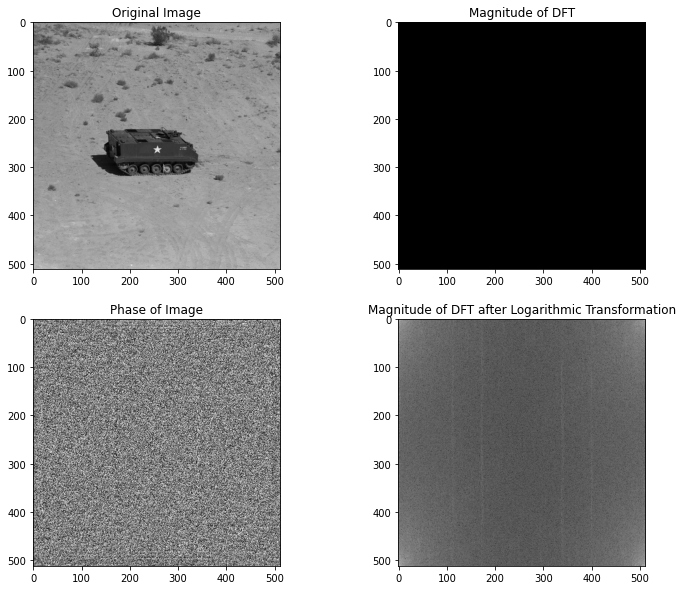

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(np.abs(imgDFT),cmap='gray')
plt.title("Magnitude of DFT")

plt.subplot(2,2,3)
plt.imshow(np.angle(imgDFT),cmap='gray')
plt.title("Phase of Image")

plt.subplot(2,2,4)
plt.imshow(J_FSCS,cmap='gray')
plt.title("Magnitude of DFT after Logarithmic Transformation")

plt.show()

### Centered DFT

In [14]:
def CenteredDFT(img):
    
    I = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            I[i][j] = pow(-1,i+j) * img[i][j]
            
    return DFTMatrixMultiplication(I)

In [15]:
Centeredimg_DFT = CenteredDFT(img)

J = np.log2(1 + abs(Centeredimg_DFT))
A = np.min(J)
B = np.max(J)
K = 256

P = (K-1)/(B - A)
L = -A*(K-1)/(B - A)
J_FSCS = (P*J + L).astype(int)

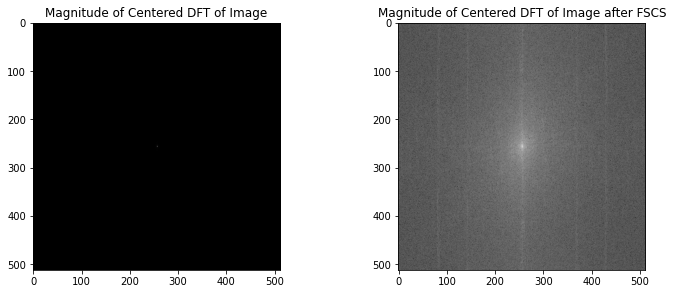

In [16]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(np.abs(Centeredimg_DFT),cmap = 'gray')
plt.title("Magnitude of Centered DFT of Image")

plt.subplot(2,2,2)
plt.imshow(J_FSCS,cmap='gray')
plt.title("Magnitude of Centered DFT of Image after FSCS")

plt.show()

### IDFT is inverse of DFT
IDFT(DFT[I]) = I

In [17]:
np.array_equal(img,IDFTMatrixMultiplication(DFTMatrixMultiplication(img)))

True

### Importance of Phase

In [18]:
Mag = np.abs(imgDFT)
Phase = np.angle(imgDFT)
I = img

In [19]:
def Synthesis(Mag,Phase):
    I_DFT = np.multiply(Mag,np.exp(1j * Phase))
    return IDFTMatrixMultiplication(I_DFT)

#### Transpose of Phase

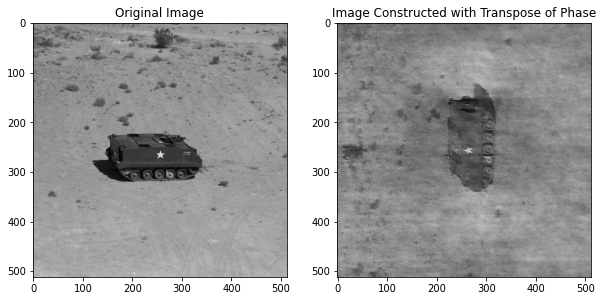

In [20]:
J = Synthesis(Mag,np.transpose(Phase))

plt.figure(figsize = (10,8))

plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(J,cmap='gray')
plt.title("Image Constructed with Transpose of Phase")

plt.show()

#### Setting Phase to 0

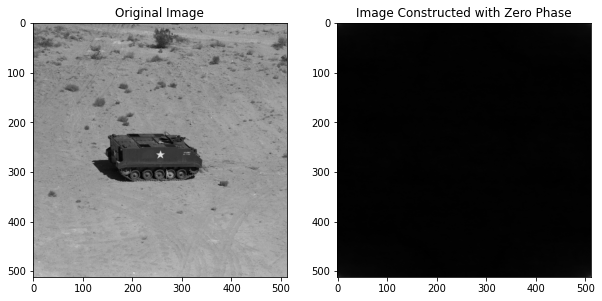

In [21]:
J = Synthesis(Mag,np.zeros(Mag.shape))

plt.figure(figsize = (10,8))

plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(J,cmap='gray')
plt.title("Image Constructed with Zero Phase")

plt.show()

#### Adding Noise to Phase

Adding Noise with value ranging from $[-2,2]$

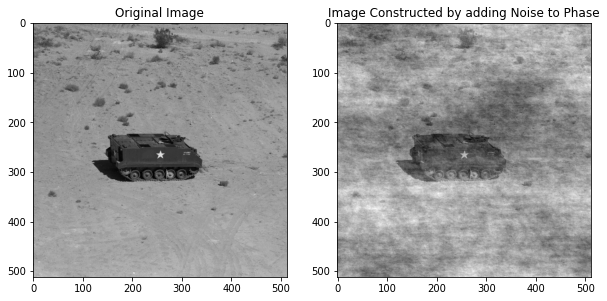

In [22]:
P = Phase + (np.random.rand(Phase.shape[0],Phase.shape[1]) - 0.5)*4
J = Synthesis(Mag,P)

plt.figure(figsize = (10,8))

plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(J,cmap='gray')
plt.title("Image Constructed by adding Noise to Phase")

plt.show()

## Periodic Convolution

### Reading Image

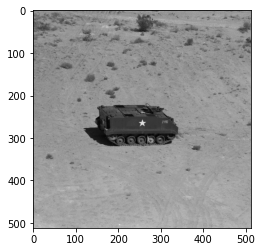

In [23]:
img = pimg.imread('Images/7.1.08.tiff')
plt.imshow(img,cmap='gray')
plt.show()

### Circular Convolution

Circular Convolution between Image and Averaging Filter of size 5 × 5

In [24]:
def CircularConvolution(I1, I2):
    n1,m1 = I1.shape
    n2,m2 = I2.shape
    
    J = np.zeros(I1.shape)
    
    for i in range(n1):
        for j in range(m1):
            for p in range(n2):
                for q in range(m2):
                    J[i][j] = J[i][j] + (I2[p][q] * I1[(i-p)%n1][(j-q)%m1])
                    
    return np.round(J)

In [25]:
Filter = np.ones((5,5))/25
I2 = Filter
I1 = img

CircularConvolutedImage = CircularConvolution(I1, I2)

#### Plotting Image after Convolution

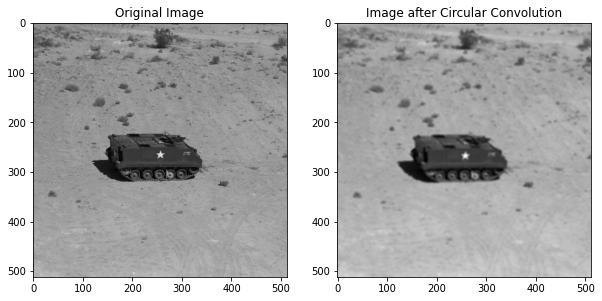

In [26]:
plt.figure(figsize = (10,8))

plt.subplot(1,2,1)
plt.imshow(I1,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(CircularConvolutedImage,cmap='gray')
plt.title("Image after Circular Convolution")

plt.show()

### Padding Images and Filter to Same Size

The minimum dimensions of Image and Filter after Padding is N+M-1XN+M-1$ where NXN is dimensions of Image and MXM is dimensions of Filter. We are following this method for Faater Computation as Padding both Image and Filter to Dimensions 2NX2N and then performing Circular Convolution takes time.

In [27]:
def Pad(I1,I2):
    n = I1.shape[0]
    m = I2.shape[0]
    
    I1_Padded = np.zeros((n+m-1,n+m-1))
    I2_Padded = np.zeros((n+m-1,n+m-1))
    
    I1_Padded[:n,:n] = I1
    I2_Padded[:m,:m] = I2
    
    return I1_Padded,I2_Padded

I1_Padded,I2_Padded = Pad(I1,I2)

### Linear Convolution using Circular Convolution Function

Using Padded Image and Filter to perform the Linear Convolution using Circular Convolution Function.

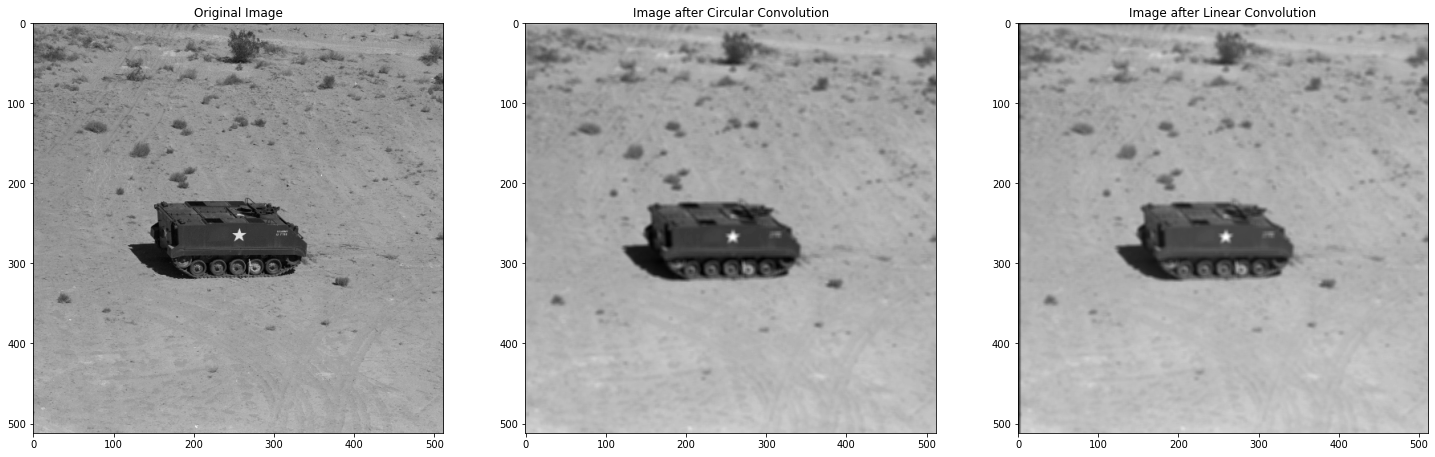

In [28]:
LinearConvolutedImage = CircularConvolution(I1_Padded, I2)[:I1.shape[0],:I1.shape[1]]

plt.figure(figsize = (25,15))

plt.subplot(1,3,1)
plt.imshow(I1,cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(CircularConvolutedImage,cmap='gray')
plt.title("Image after Circular Convolution")

plt.subplot(1,3,3)
plt.imshow(LinearConvolutedImage,cmap='gray')
plt.title("Image after Linear Convolution")

plt.show()

### Performing Linear Convolution in Frequency Domain by Padding Zeros to Image

For Multiplication in Frequency Domain, Dimensions of Image and Filter should be same. So, We will be using Padded Image and Padded Filter.

In [29]:
I1_Padded_DFT = DFTMatrixMultiplication(I1_Padded)
I2_Padded_DFT = DFTMatrixMultiplication(I2_Padded)

J_Padded_DFT = np.multiply(I1_Padded_DFT,I2_Padded_DFT)

J_Padded = IDFTMatrixMultiplication(J_Padded_DFT)
J = J_Padded[:I1.shape[0],:I1.shape[1]]

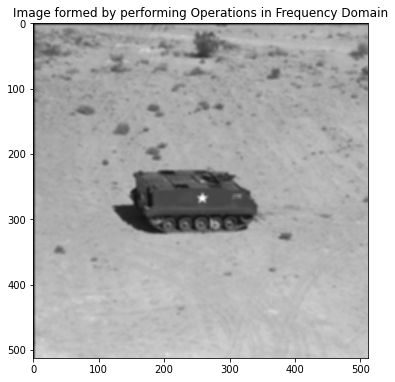

In [30]:
plt.figure(figsize=(6,8))
plt.title("Image formed by performing Operations in Frequency Domain")
plt.imshow(J,cmap='gray')
plt.show()

#### Verifying Linear Convolution Results in Time and Frequency Domain

In [31]:
np.array_equal(J,LinearConvolutedImage)

True

## Image Denoising using Linear Filters

**Noise:** AWGN with $\mu=0$ and $\sigma^2 = 25$

### Reading Image

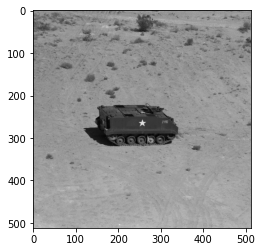

In [32]:
img = pimg.imread('Images/7.1.08.tiff')
plt.imshow(img,cmap='gray')
plt.show()

### Adding Noise and Generating Image

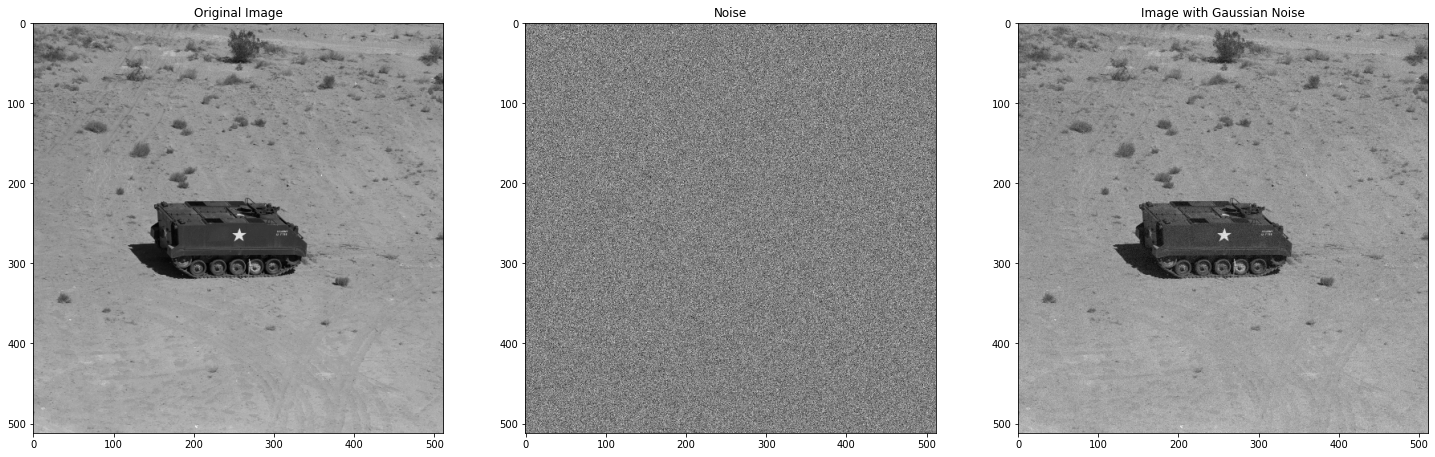

In [33]:
Mean = 0
StandardDeviation = 5

Noise = np.random.normal(Mean,StandardDeviation,img.shape)
I = img + Noise

plt.figure(figsize = (25,8))

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(Noise,cmap='gray')
plt.title("Noise")

plt.subplot(1,3,3)
plt.imshow(I,cmap='gray')
plt.title("Image with Gaussian Noise")

plt.show()

### Filters

In [34]:
def LinearFilter(Size):
    return (np.ones((Size,Size)))/(Size*Size)

def Gaussian2D(x,y,mu,sigma):
    t2 = np.exp(-1*(pow(x-mu,2) + pow(y-mu,2))/(2*pow(sigma,2)))
    t1 = 1/(2*np.pi*sigma*sigma)
    return t1*t2 
    
def GaussianFilter(Size,StdDev):
    # Assuming the Filter has values of 2D Gaussian Function in all 4-Directions.
    # So, Center of Filter should have the Gaussian Peak.
    mu = (Size-1)/2
    sigma = StdDev
    Filter = np.zeros((Size,Size))
    
    for i in range(Size):
        for j in range(Size):
            Filter[i][j] = Gaussian2D(i,j,mu,sigma)
            
    return Filter   

### Linear Filter

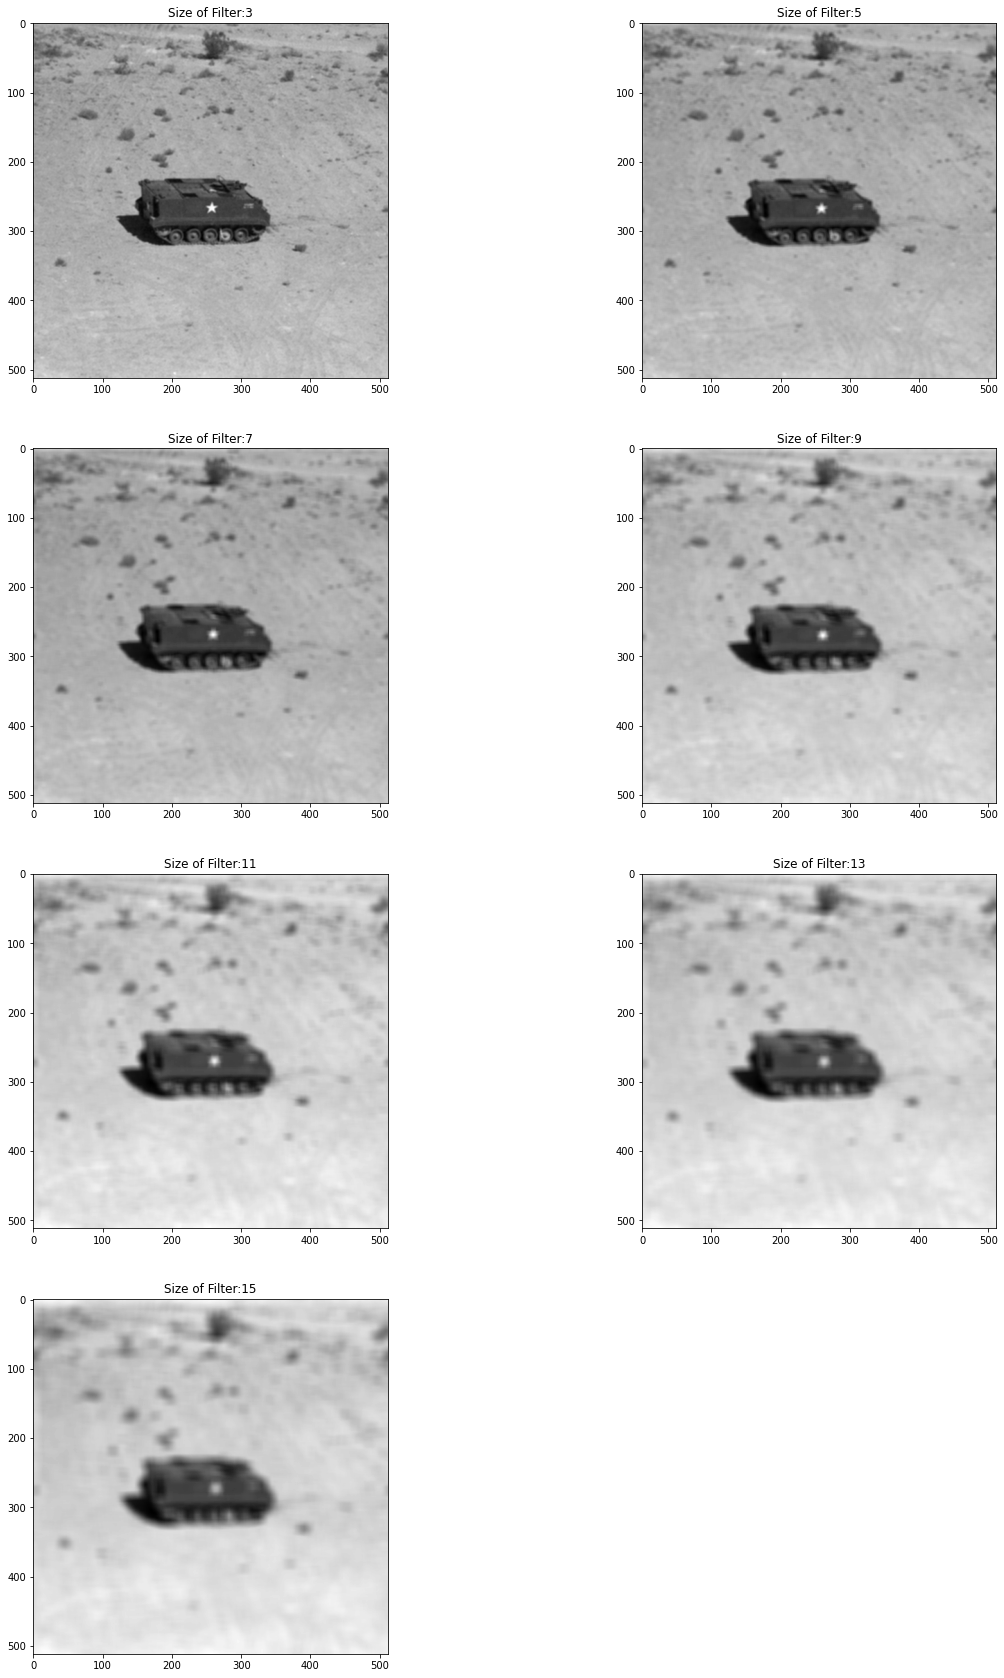

In [35]:
Sizes = np.arange(3,17,2)
n = Sizes.shape[0]

plt.figure(figsize=(20,30))

for i in range(n):
    plt.subplot(int(np.ceil(n/2)),2,i+1)
    plt.imshow(CircularConvolution(I, LinearFilter(Sizes[i])),cmap='gray')
    plt.title('Size of Filter:' + str(Sizes[i]))

With increase of Filter Size, Denoising gets better but Image gets Smoothened. 5X5 Filter Size is the Optimal one to Denoise without much Smoothening.

### Gaussian Filter

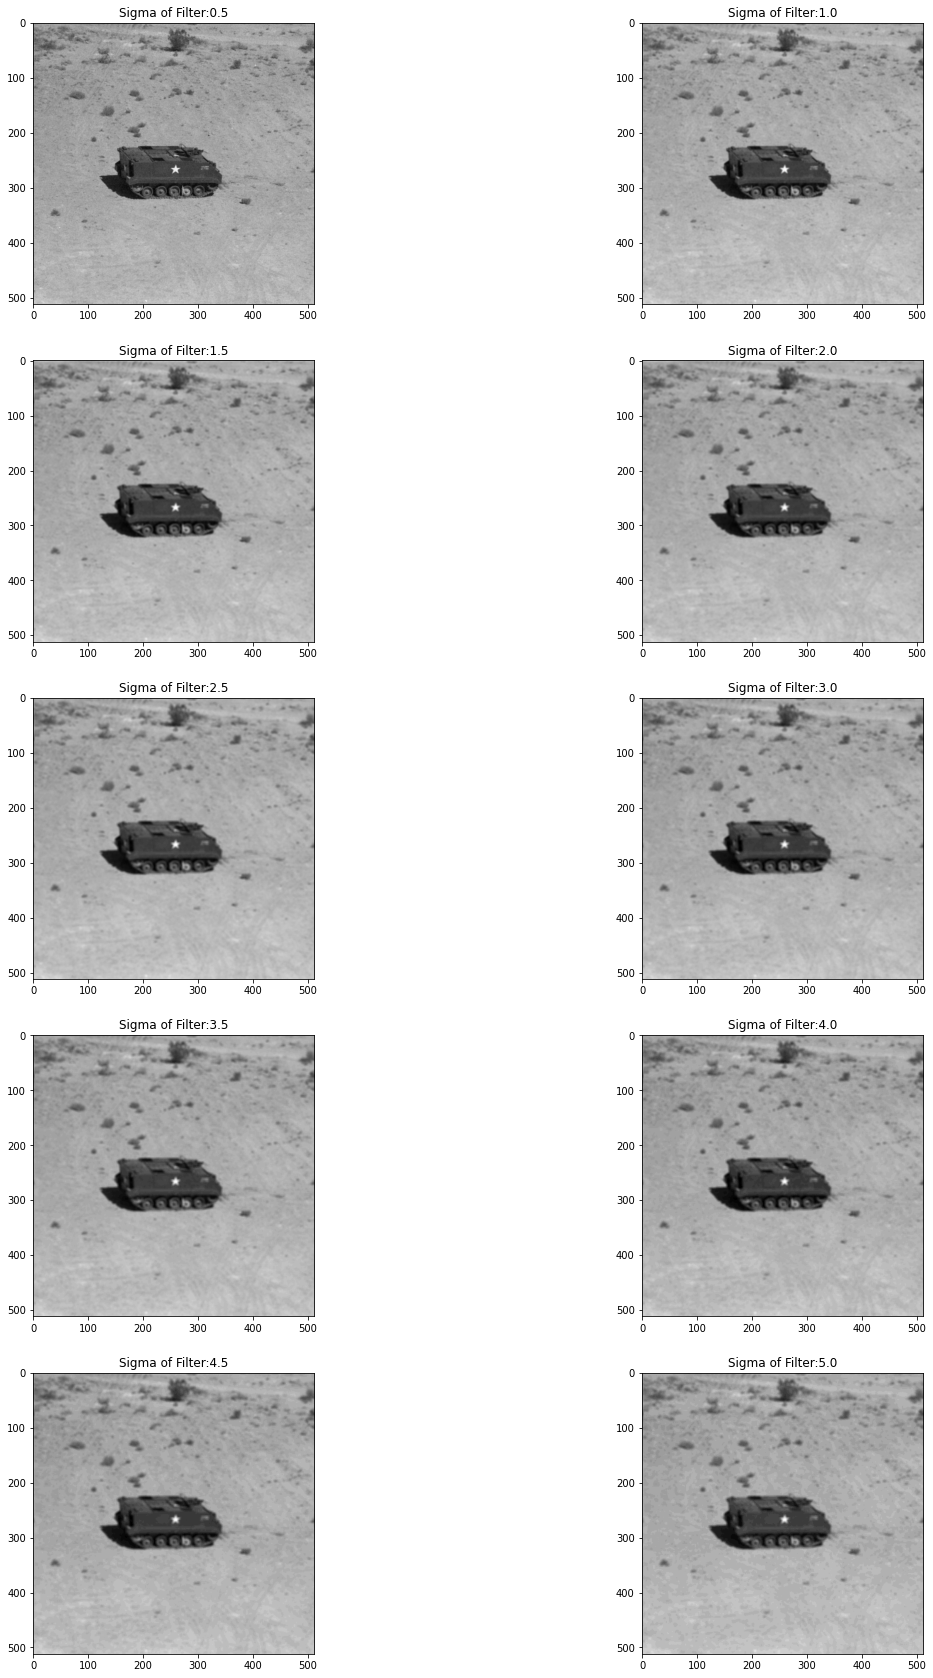

In [36]:
StdDevs = np.arange(0.5,5.5,0.5)
n = StdDevs.shape[0]

plt.figure(figsize=(20,30))

for i in range(n):
    plt.subplot(int(np.ceil(n/2)),2,i+1)
    plt.imshow(CircularConvolution(I, GaussianFilter(5,StdDevs[i])),cmap='gray')
    plt.title('Sigma of Filter:' + str(StdDevs[i]))

With increase of Standard Deviation of Gaussian Filter, Image gets Denoised and gets slightly smoothened.